# MOwNiT 

## Laboratorium 4 - Interpolacja

## Zadania 

In [1]:
using Polynomials, Interpolations, Plots, DataFrames, Statistics, Plots.PlotMeasures

### Zadanie 1 (1p)
Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny  Lagrange'a .  Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji.

Wykorzystany wzór:

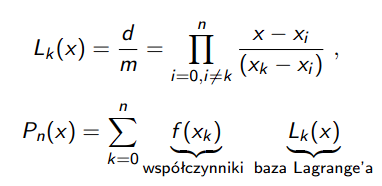

In [2]:
function Lagrange(xs, ys, x)
    P = 0
    len = length(xs)
    
    for k in 1:len
        L = 1
        for i in 1:len
            if i != k
                L *= (x - xs[i]) / (xs[k] - xs[i])
            end
        end
        P += ys[k] * L
    end
    return P
end

Lagrange (generic function with 1 method)

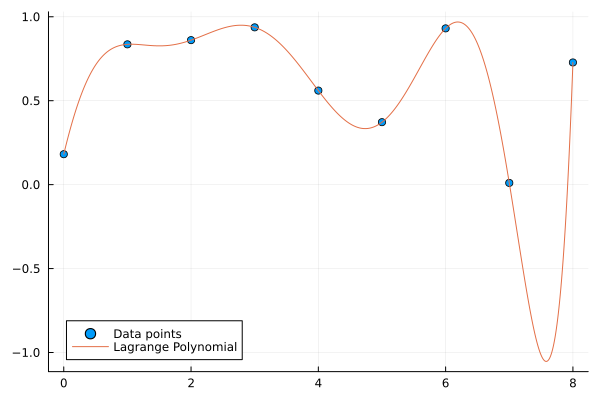

In [3]:
xs = 0:1:8
ys = [rand() for x in xs]

xsf = 0:0.01:8
ys_lagrange = [Lagrange(xs, ys, x) for x in xsf]

scatter(xs, ys, label="Data points")
plot!(xsf, ys_lagrange, label="Lagrange Polynomial")

### Zadanie 2 (2p)
Zrobic to samo dla metody  Newtona (metoda ilorazów róznicowych). Narysować wykres wielomianu interpolacyjnego otrzymanego metodą Newtona dla tych samych danych, co w poprzednim punkcie. Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ : 
   1. napisać funkcję `NewtonInterpolation`, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" `newt`
   1. napisać funkcję która wylicza wartość wielomianu dla obiektu `newt` w punkcie x za pomocą  <b>schematu Hornera dla postaci Newtona

In [4]:
function NewtonInterpolation(xs, ys)
    T = Float64[]
    n = length(xs)

    id = 0
    
    for a in 1:n
        push!(T, ys[a])
        id += 1
        for i in 1:a-1
            nom = T[id] - T[id-a+1]
            den = xs[a] - xs[a-i]
            push!(T, nom / den)
            id += 1
        end
    end
    
    newt = Float64[]
    k = 0
    
    for i in 1:n
        k += i
        push!(newt, T[k])
    end
    return newt
end

NewtonInterpolation (generic function with 1 method)

Schemat Hornera dla postaci Newtona obliczymy ze wzoru:

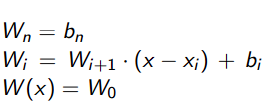

In [5]:
function NewtonHorner(newt, xs, x)
    n = length(xs)
    
    W = newt[n]
    for i = 1:n-1
        W = W * (x - xs[n-i]) + newt[n-i]
    end
    return W
end

NewtonHorner (generic function with 1 method)

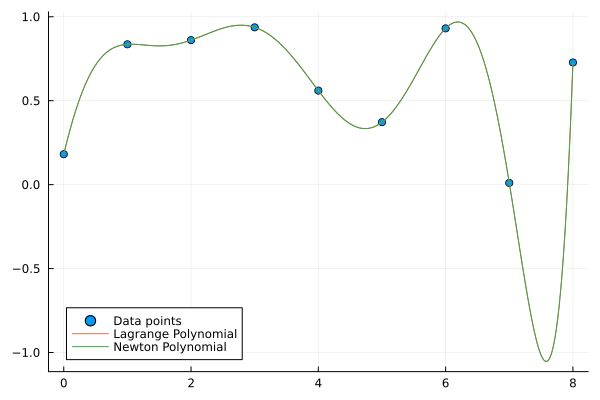

In [6]:
newt = NewtonInterpolation(xs, ys)
ys_newton = [NewtonHorner(newt, xs, x) for x in xsf]

plot!(xsf, ys_newton, label="Newton Polynomial")

### Zadanie 3 (1p)
Zastosować interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego?

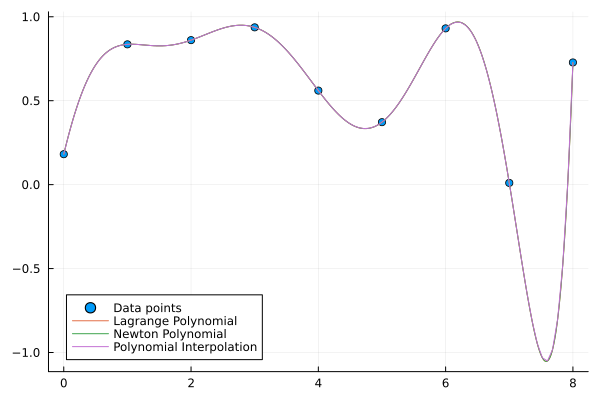

In [7]:
plot!(fit(xs, ys), extrema(xsf)..., label="Polynomial Interpolation")

Możemy zauważyć, że wszystkie 3 wyniki interpolacji wielomianowej są niemalże takie same. Wynika to z poniższego twierdzenia:

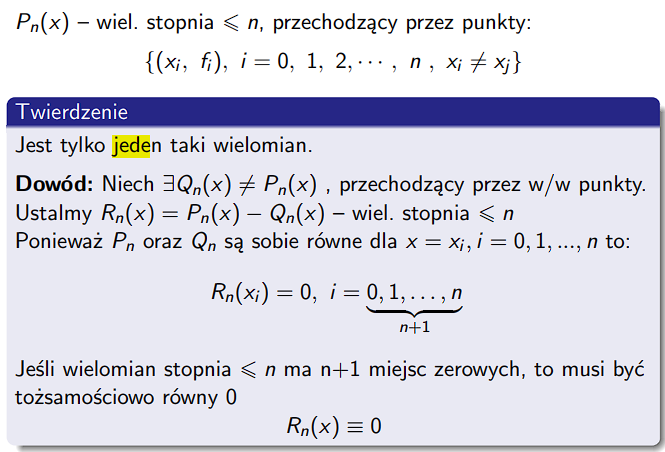

### Zadanie 4 (2p)
Porównać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Uwaga: dodatkowo, dla metody Newtona i pakietu Polynomials należy osobno zmierzyć czas wyliczania wielomianu i osobno czas wyliczania wartości w punkcie. Dokonać pomiaru 10 razy i policzyć wartość średnią oraz oszacować błąd pomiaru za pomocą odchylenia standardowego; wyniki przedstawić na wykresach.

In [8]:
struct Row
    type::String
    nodes::Int64
    time::Float64
end

In [9]:
# "Rozgrzanie"
xs = 0:0.2:10
ys = [rand() for x in xs]
xsf = 0:0.01:10

newt = NewtonInterpolation(xs, ys)
polyn = fit(xs,ys)
[polyn(x) for x in xsf]
[NewtonHorner(newt,xs,x) for x in xsf]
[Lagrange(xs,ys,x) for x in xsf]

rows = Row[]

for i in 50:50:500
    for _ in 1:10
        width = 10/i
        xs = 0:width:10
        ys = [rand() for x in xs]
        xsf = 0:0.01:10
        
        polyn, fit_time = @timed fit(xs,ys)
        newt, newt_time = @timed NewtonInterpolation(xs, ys)
        _, val_time = @timed [polyn(x) for x in xsf]
        _, newt_val_time = @timed [NewtonHorner(newt,xs,x) for x in xsf]
        _, lagrange_time = @timed [Lagrange(xs,ys,x) for x in xsf]
        
        push!(rows, Row("Polynomials fit", i, fit_time))
        push!(rows, Row("Newton fit", i, newt_time))
        push!(rows, Row("Polynomials value", i, val_time))
        push!(rows, Row("Newton value", i, newt_val_time))
        push!(rows, Row("Lagrange", i, lagrange_time))
    end
end

df = DataFrame(rows)

df

Row,type,nodes,time
,String,Int64,Float64
1,Polynomials fit,50,1.8572e-5
2,Newton fit,50,2.2393e-5
3,Polynomials value,50,0.031782
4,Newton value,50,0.0328995
5,Lagrange,50,0.0418286
6,Polynomials fit,50,1.6906e-5
7,Newton fit,50,2.0073e-5
8,Polynomials value,50,8.5857e-5
9,Newton value,50,0.000174358


In [10]:
result = sort(combine(groupby(df, [:type, :nodes]), 
                 :time => (time -> mean(time)) => :mean, 
                 :time => (time -> std(time)) => :std
), [:type])

Row,type,nodes,mean,std
,String,Int64,Float64,Float64
1,Lagrange,50,0.01294,0.0101512
2,Lagrange,100,0.0389559,0.00169017
3,Lagrange,150,0.0840778,0.00148656
4,Lagrange,200,0.146137,0.000997156
5,Lagrange,250,0.227292,0.00361554
6,Lagrange,300,0.324387,0.00177571
7,Lagrange,350,0.439755,0.00423514
8,Lagrange,400,0.577868,0.00604237
9,Lagrange,450,0.737964,0.0209011


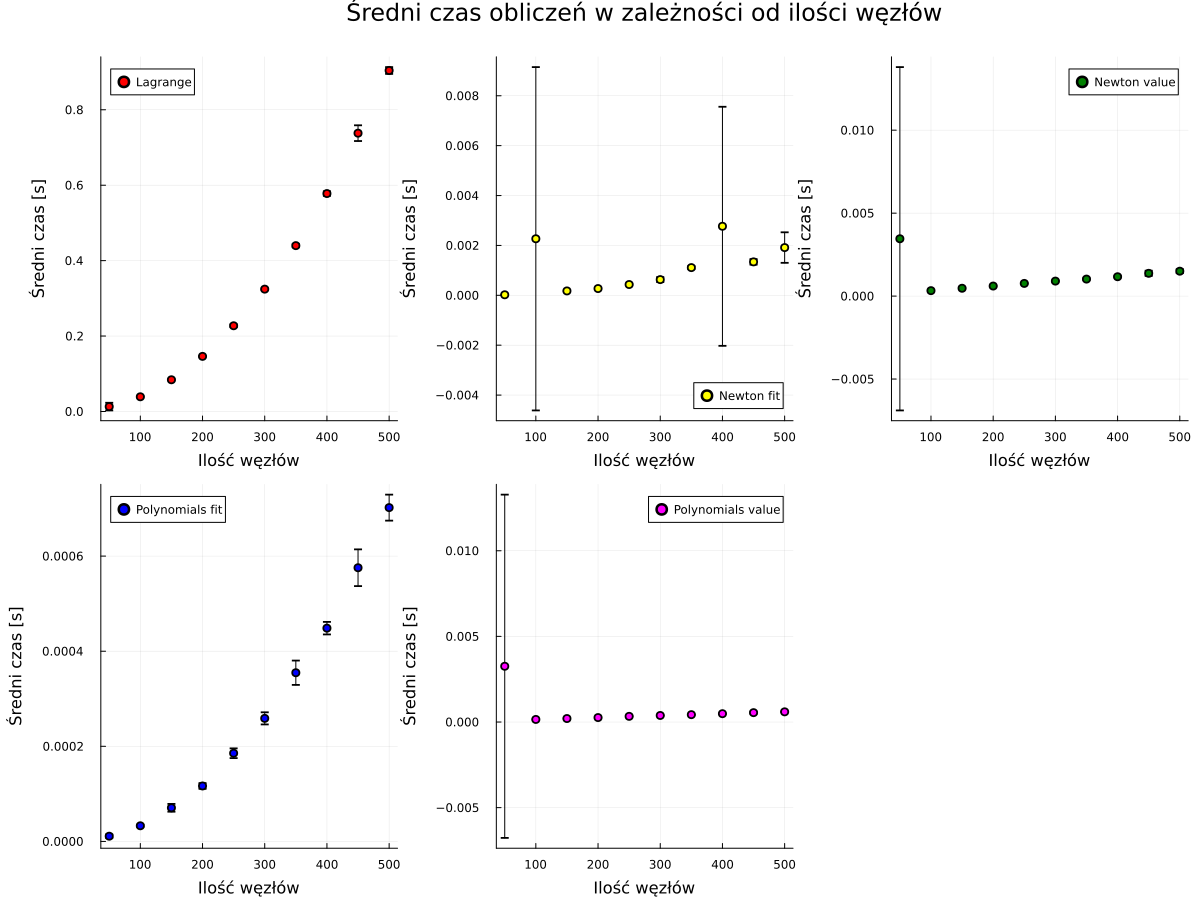

In [16]:
scatter(
    result.nodes, 
    result.mean, 
    group=result.type, 
    yerror=result.std, 
    color=[:red :yellow :green :blue :magenta], 
    layout=length(unique(result.type)), 
    titlefont=font(12),
    suptitle="Średni czas obliczeń w zależności od ilości węzłów", 
    size=(1200, 900),
    xlabel="Ilość węzłów", 
    ylabel="Średni czas [s]",
)

plot!( 
    subplot=4, 
    left_margin=5mm
)

### Zadanie 5 (1p)
Zaimplementować algorytm Neville’a i sprawdzić (dla kilku wybranych punktów), czy daje te same wartości wielomianu co wybrana interpolacja wielomianowa.

In [12]:
function Neville(xs, ys, x)
    n = length(xs)
    P = zeros(Float64, n, n)
    for i = 1:n
        P[i, 1] = ys[i]
    end
    for i = 2:n
        for k = i:n
            P[k,i] = ((x - xs[k]) * P[k-1, i-1] - (x - xs[k-i+1]) * P[k, i-1]) / (xs[k-i+1] - xs[k])
        end
    end
    return P[n, n]
end

Neville (generic function with 1 method)

In [13]:
xs = 0:1:8
ys = [rand() for x in xs]
test_xs = [0.13, 1.5, 2.77, 3.14, 5.28, 7.68]

println("Neville \t\tLagrange")
for x in test_xs
    println(Neville(xs,ys,x), "\t", Lagrange(xs,ys,x))
end

Neville 		Lagrange
0.4096444984416214	0.4096444984416214
0.43451705917015804	0.43451705917015804
0.13441281740915106	0.134412817409151
0.32631840461411865	0.32631840461411854
0.4788624165361739	0.47886241653617395
-0.12240218572800496	-0.12240218572800463


### Zadanie 6 (1p)
Poeksperymentować z  interpolacją funkcjami sklejanymi (minimum dwie różne funkcje sklejane),  narysować wykresy i porównać z wykresami interpolacji wielomianowej. <b>Zademonstrować  efekt Rungego</b>. 

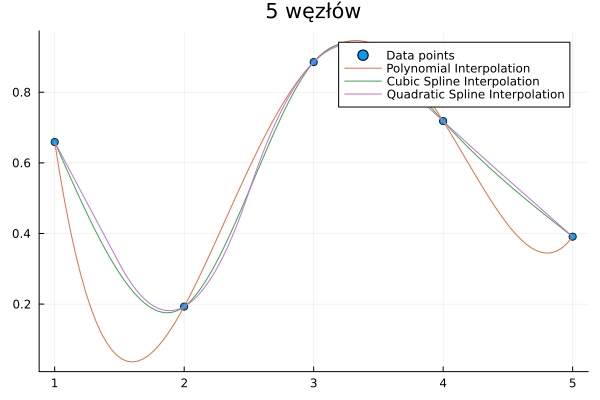

In [14]:
xsf = 1:0.01:5
xs =  1:1:5
ys = [rand() for x in xs]

scatter(xs, ys, label="Data points")

plot!(fit(xs, ys),  extrema(xs)..., label="Polynomial Interpolation")

interp_cubic = CubicSplineInterpolation(xs, ys)
ys_cubic=[interp_cubic(x) for x in xsf]
  
plot!(xsf, ys_cubic, label="Cubic Spline Interpolation")

quadratic = interpolate(ys, BSpline(Quadratic()))
ys_quadratic = [quadratic(x) for x in xsf]
plot!(xsf, ys_quadratic, label="Quadratic Spline Interpolation", title="5 węzłów")

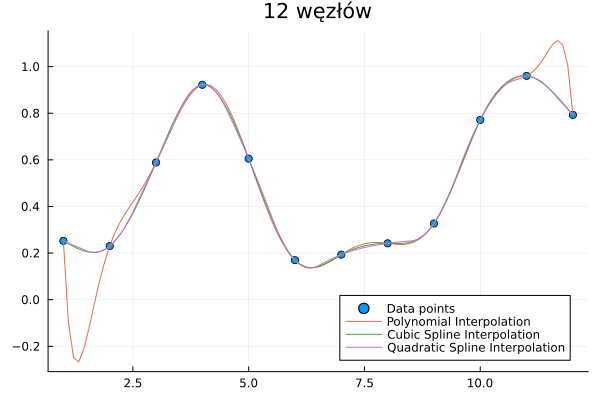

In [15]:
using Polynomials, Interpolations, Plots

xsf = 1:0.01:12
xs =  1:1:12
ys = [rand() for x in xs]

scatter(xs, ys, label="Data points")

plot!(fit(xs, ys),  extrema(xs)..., label="Polynomial Interpolation")

cubic = CubicSplineInterpolation(xs, ys)
ys_cubic=[cubic(x) for x in xsf]
  
plot!(xsf, ys_cubic, label="Cubic Spline Interpolation")

quadratic = interpolate(ys, BSpline(Quadratic()))
ys_quadratic = [quadratic(x) for x in xsf]
plot!(xsf, ys_quadratic, label="Quadratic Spline Interpolation", title="12 węzłów")

Interpolacja funkcjami sklejanymi zdaje się dawać efekt bliższy spodziewanemu, zwłaszcza dla większej liczby węzłów. Im większa ilość węzłów interpolacji, tym trudniej interpolacji wielomianowej dopasować się na końcach przedziałów, co dobrze widać na powyższych wykresach. Efekt ten nazywamy efektem Rungego